In [11]:
import pandas as pd

# Load the dataset
file_path = '/Applications/fire.csv'
wildfire_data = pd.read_csv(file_path)

# Display basic information about the dataset
print(wildfire_data.info())

# Display the first few rows of the dataset
print(wildfire_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22914 entries, 0 to 22913
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fire_year                     22914 non-null  int64  
 1   fire_number                   22914 non-null  int64  
 2   current_size                  22914 non-null  float64
 3   fire_location_latitude        22914 non-null  float64
 4   fire_location_longitude       22914 non-null  float64
 5   fire_origin                   22905 non-null  object 
 6   general_cause_desc            22914 non-null  object 
 7   industry_identifier_desc      408 non-null    object 
 8   responsible_group_desc        9031 non-null   object 
 9   activity_class                14204 non-null  object 
 10  true_cause                    12488 non-null  object 
 11  fire_start_date               22294 non-null  object 
 12  det_agent                     22913 non-null  object 
 13  d

In [13]:
# Assuming your dataframe is named wildfire_data

# Identify non-numeric columns
non_numeric_columns = wildfire_data.select_dtypes(exclude=['number']).columns

# Convert non-numeric columns to numeric
wildfire_data[non_numeric_columns] = wildfire_data[non_numeric_columns].apply(pd.to_numeric, errors='coerce')

# Now, check if there are any remaining non-numeric values
remaining_non_numeric = wildfire_data.select_dtypes(exclude=['number']).columns

# If there are still non-numeric values, you may need to handle them based on your specific requirements.
# For example, you can replace them with NaN or a default value.
# wildfire_data[remaining_non_numeric] = wildfire_data[remaining_non_numeric].apply(pd.to_numeric, errors='coerce')

# Now you can proceed with calculating the correlation matrix
correlation_matrix = wildfire_data.corr()

# Rest of your code for plotting the heatmap


          fire_year  fire_number   current_size  fire_location_latitude  \
count  22914.000000  22914.00000   22914.000000            22914.000000   
mean    2012.820896  11457.50000     155.060680               54.953780   
std        4.517263   6614.84637    5906.681475                2.642913   
min     2006.000000      1.00000       0.010000               48.998195   
25%     2009.000000   5729.25000       0.010000               53.075638   
50%     2013.000000  11457.50000       0.020000               55.300575   
75%     2016.000000  17185.75000       0.300000               56.797629   
max     2021.000000  22914.00000  577646.800000               59.999510   

       fire_location_longitude  fire_origin  general_cause_desc  \
count             22914.000000          0.0                 0.0   
mean               -115.222288          NaN                 NaN   
std                   2.309475          NaN                 NaN   
min                -119.999983          NaN             

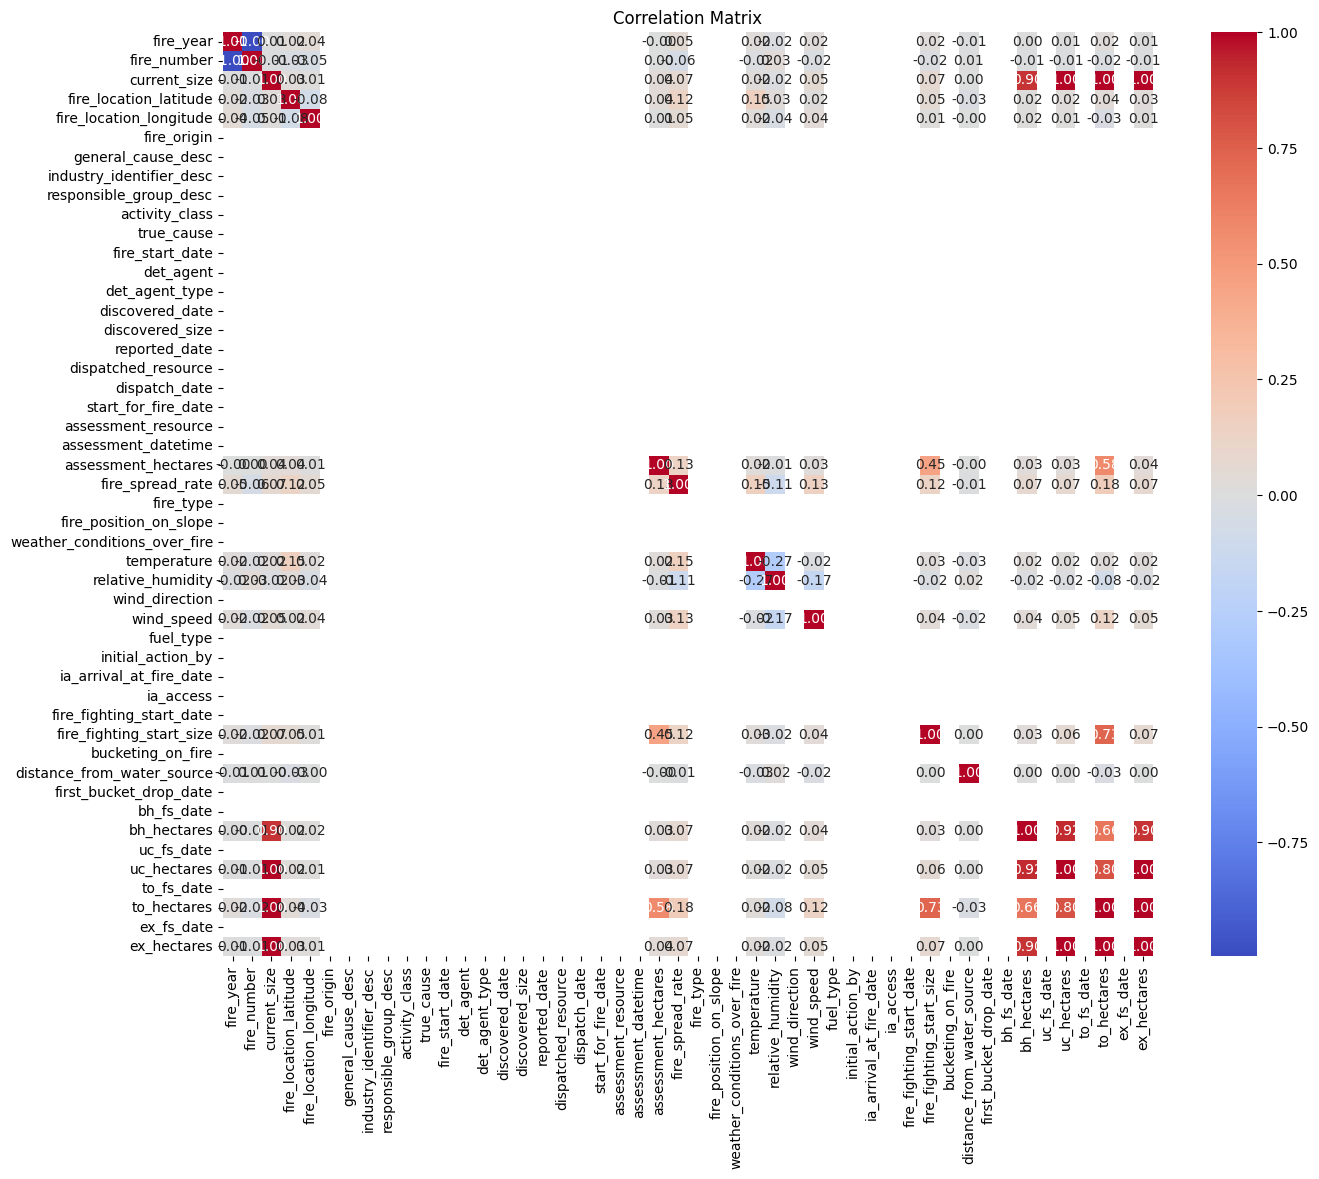

In [14]:
# Descriptive statistics
print(wildfire_data.describe())

# Visualize correlations
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = wildfire_data.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [24]:
# Example: Assuming 'fire_frequency' is a feature representing historical fire frequency
vulnerable_regions = wildfire_data[wildfire_data['current_size'] > 0]


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error

# Features and target variable
X = wildfire_data.drop(columns=['current_size'])
y = wildfire_data['current_size']

# Drop columns with all missing values
X = X.dropna(axis=1, how='all')

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Ensure the indices match between X_imputed and y
y = y[X_imputed.index]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 2.5682079343318757e-12


In [28]:
# Get model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))


                       Feature   Coefficient
15                 ex_hectares  1.000000e+00
0                    fire_year  1.145800e-12
2       fire_location_latitude  6.637904e-13
6             fire_spread_rate  4.946598e-14
3      fire_location_longitude  2.956715e-14
9                   wind_speed  4.718365e-15
13                 uc_hectares  1.381036e-15
1                  fire_number  1.118029e-15
10    fire_fighting_start_size  8.611841e-16
7                  temperature  2.327428e-16
4                    det_agent  2.220446e-16
14                 to_hectares -1.497833e-16
11  distance_from_water_source -4.478156e-16
5          assessment_hectares -8.040432e-16
8            relative_humidity -1.002792e-15
12                 bh_hectares -2.552010e-15


In [52]:
import requests

# Example: Use a weather API (e.g., OpenWeatherMap)
api_key = 'I_am_removing_the_key_due_to_privacy_reasons'
city = 'Alberta'  # You can specify the location relevant to your dataset

url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}'
response = requests.get(url)
weather_data = response.json()

# Display the retrieved weather data
print(weather_data)


{'coord': {'lon': -96.0475, 'lat': 45.5733}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 273.23, 'feels_like': 266.84, 'temp_min': 271.98, 'temp_max': 275.01, 'pressure': 1013, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 8.23, 'deg': 330, 'gust': 10.8}, 'clouds': {'all': 100}, 'dt': 1708722232, 'sys': {'type': 1, 'id': 4956, 'country': 'US', 'sunrise': 1708694045, 'sunset': 1708732889}, 'timezone': -21600, 'id': 5016042, 'name': 'Alberta', 'cod': 200}


In [41]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Features and target variable
X = wildfire_data.drop(columns=['current_size'])
y = wildfire_data['current_size']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train an XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the XGBoost model
mae_xgb = mean_absolute_error(y_test, xgb_predictions)
print(f'Mean Absolute Error (XGBoost): {mae_xgb}')


Mean Absolute Error (XGBoost): 192.77488775804014


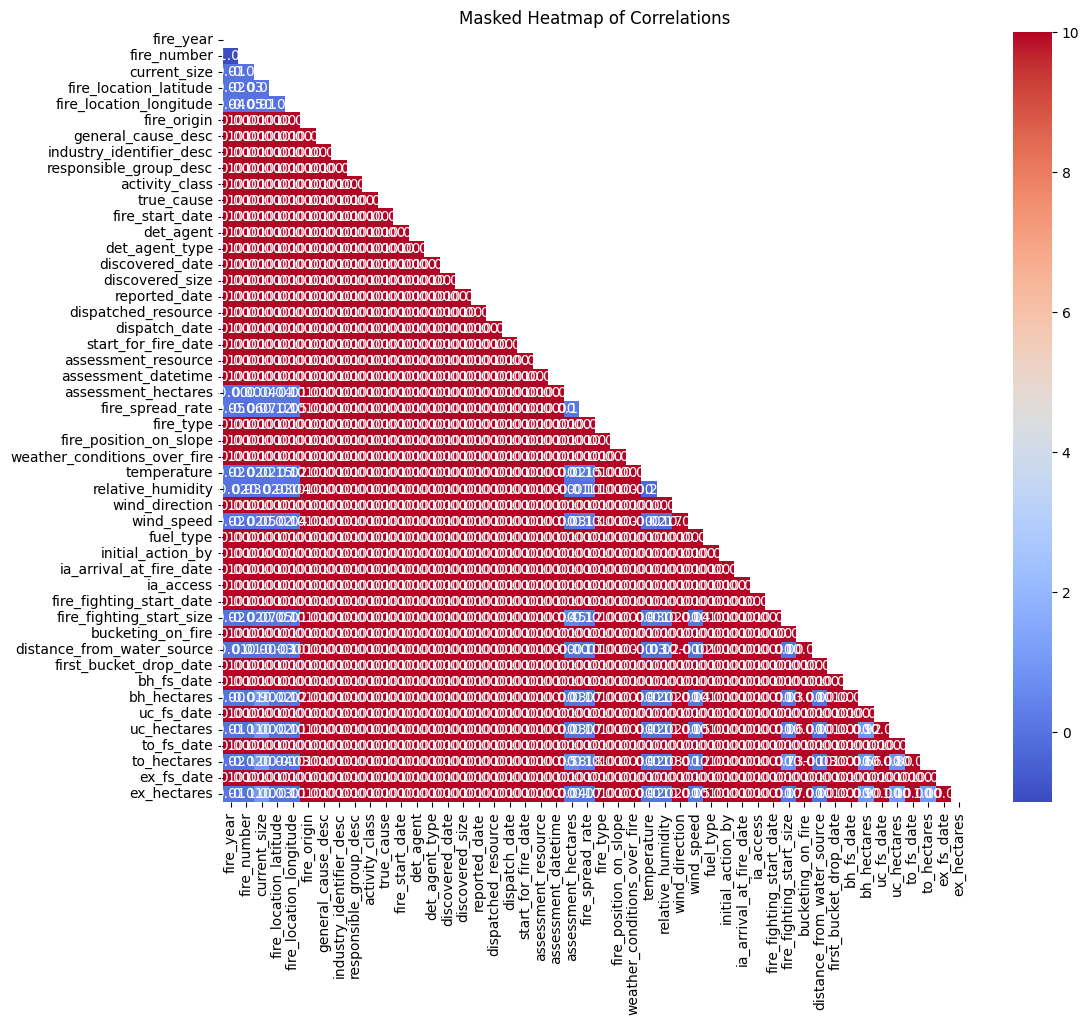

In [57]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Masked Heatmap of Correlations')
plt.show()


<Figure size 1200x1000 with 0 Axes>

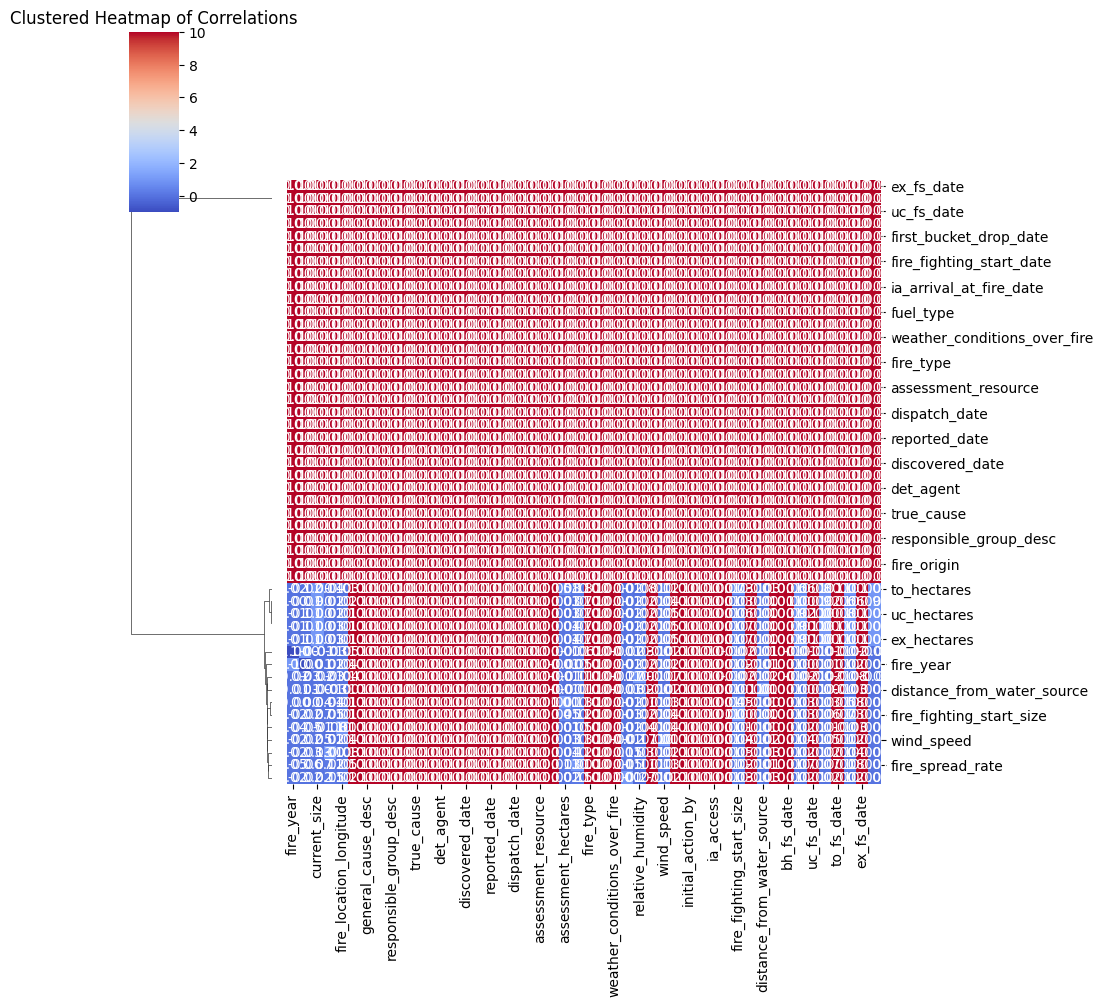

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'wildfire_data' is your DataFrame
correlation_matrix = wildfire_data.corr()

# Replace non-finite values with a large number (e.g., 10)
correlation_matrix.replace([np.inf, -np.inf, np.nan], 10, inplace=True)

# Clustered heatmap
plt.figure(figsize=(12, 10))
sns.clustermap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", method='average', col_cluster=False)
plt.title('Clustered Heatmap of Correlations')
plt.show()
